In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.integrate import solve_ivp
from collections import defaultdict
from functools import partial 
import scipy.integrate
from mpl_toolkits.mplot3d import axes3d
import matplotlib.patches as mpatches
%matplotlib inline

from utils import *


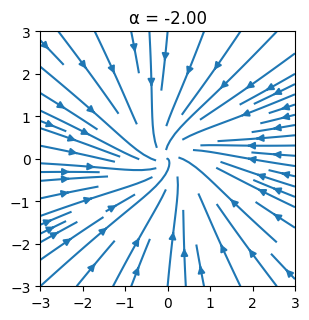

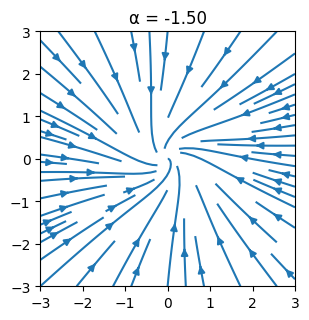

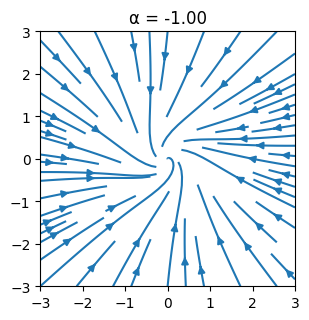

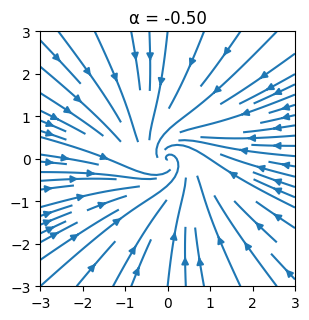

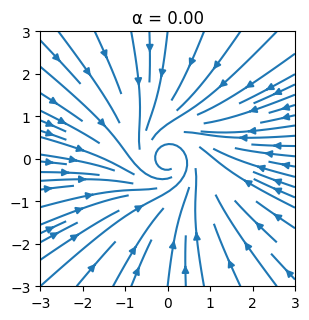

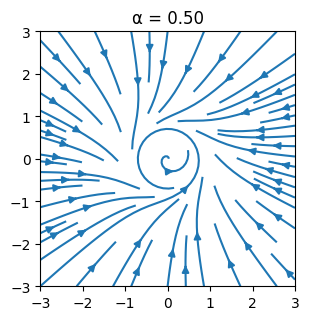

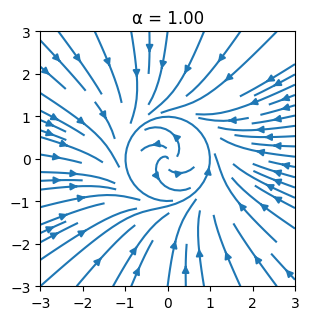

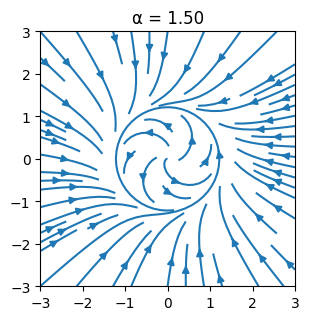

In [2]:
w = 3
x2, x1 = np.mgrid[-w:w:100j, -w:w:100j]
x = [x1,x2]
alpha = 1

# Define the vector field for the bifurcation diagram
def AH_bif(x):
    x1 = x[0]
    x2 = x[1]
    U = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    V = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))
    return np.array([U, V])
# Iterate over a range of alpha values
for alpha in np.arange(-2,2,0.5):  
    plot_phase_portrait(AH_bif(x)[0],AH_bif(x)[1],w,f"α = {alpha:.2f}")


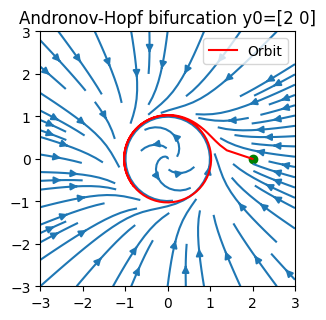

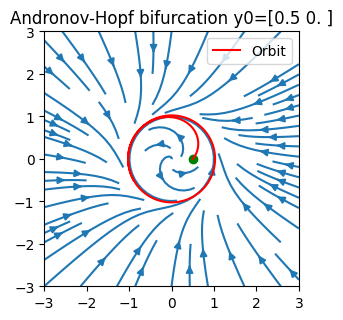

In [3]:
t = 10
alpha = 1
# Set initial conditions for two different trajectories
y0_1 = np.array([2, 0])
y0_2 = np.array([0.5, 0])
# Plot trajectories for two different initial conditions
title = 'Andronov-Hopf bifurcation '+'y0='+str(y0_1)
plot_portrait_with_traj(AH_bif,x, t,y0_1,w, title) 
title = 'Andronov-Hopf bifurcation '+'y0='+str(y0_2)
plot_portrait_with_traj(AH_bif,x, t,y0_2,w, title) 


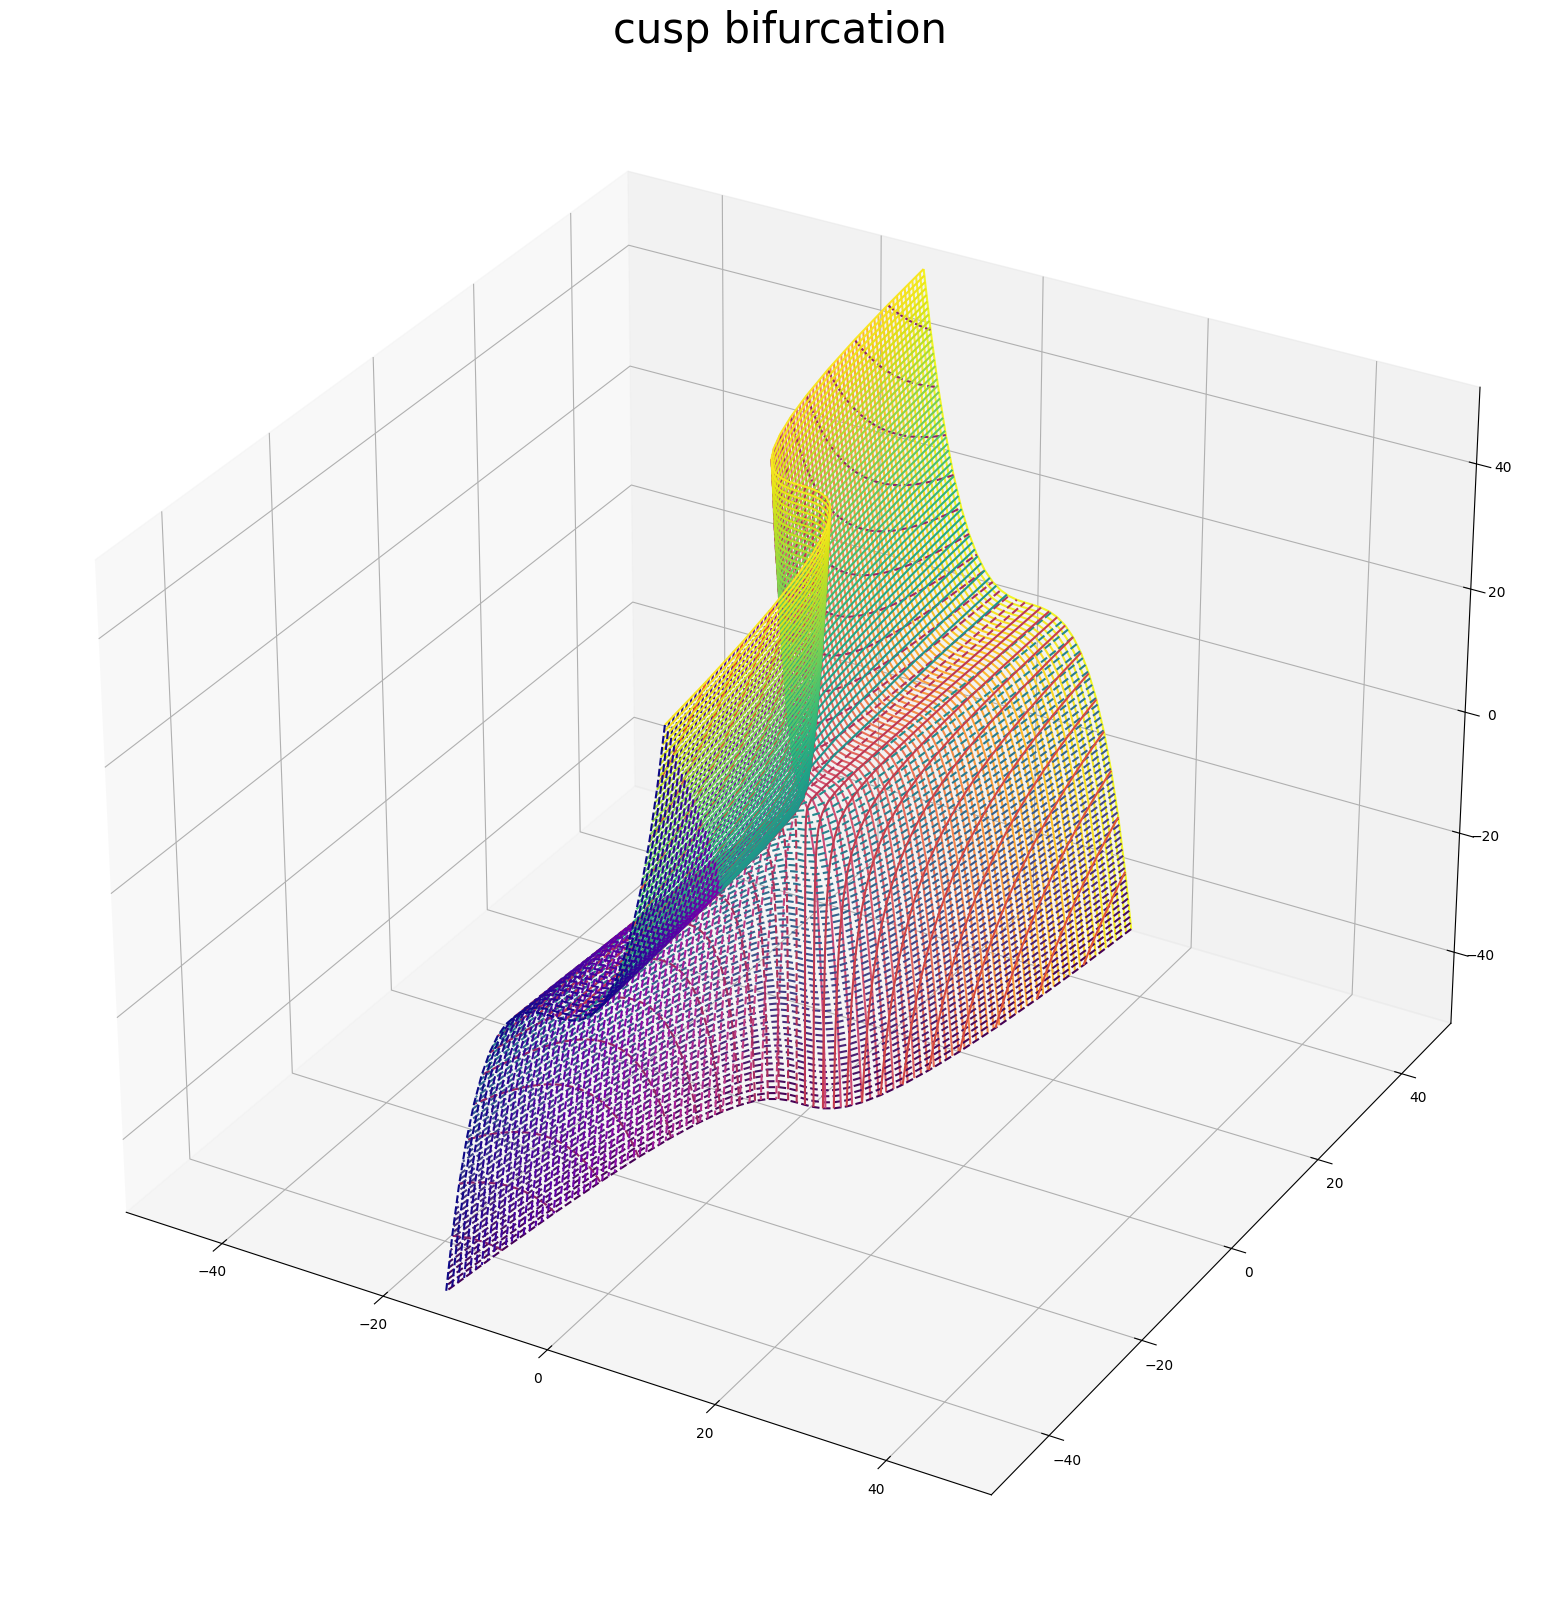

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cusp(f, bound=50, resolution=100):
    """
    Plot the cusp bifurcation using contour plots in 3D.
    :param f: Function representing the cusp bifurcation in normal form.
    :param bound: Bound for the axes in the plot.
    :param resolution: Number of points for the meshgrid resolution.
    """
    # Create a 3D plot
    fig, ax = plt.subplots(figsize=(20, 20), subplot_kw={'projection': '3d'})

    # Generate values for A and B in the meshgrid
    A = np.linspace(-bound, bound, resolution)
    B = np.linspace(-bound, bound, resolution)
    A1, A2 = np.meshgrid(A, A)

    # Plot contours in the z-direction
    for i, z in enumerate(B):
        X, Y = A1, A2
        Z = f(X, Y, z)
        ax.contour(X, Y, Z + z, levels=[z], zdir='z', colors=[plt.cm.viridis(i / len(B))])

    # Plot contours in the y-direction
    for i, y in enumerate(B):
        X, Z = A1, A2
        Y = f(X, y, Z)
        ax.contour(X, Y + y, Z, levels=[y], zdir='y', colors=[plt.cm.plasma(i / len(B))])

    # Plot contours in the x-direction
    for i, x in enumerate(B):
        Y, Z = A1, A2
        X = f(x, Y, Z)
        ax.contour(X + x, Y, Z, levels=[x], zdir='x', colors=[plt.cm.inferno(i / len(B))])

    # Set axis limits
    ax.set_xlim3d(-bound, bound)
    ax.set_ylim3d(-bound, bound)
    ax.set_zlim3d(-bound, bound)
    plt.title('cusp bifurcation', fontsize=30)

    plt.savefig('cusp bifurcation.png')
    plt.show()

# Cusp bifurcation in normal form.
def cusp(x, y, z):
    """
    Normal form of the cusp bifurcation.
    :param x: x-coordinate.
    :param y: y-coordinate.
    :param z: z-coordinate.
    :return: Function value.
    """
    return x + y * z + x**3

# Plot the cusp bifurcation using the defined function
plot_cusp(cusp)
